In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
df = pd.read_csv('housing.data',sep='\s+')
df.columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
print(pd.DataFrame(df.head()))


CRIM   ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  MEDV
0  0.02731  0.0   7.07     0  0.469  ...  242.0     17.8  396.90   9.14  21.6
1  0.02729  0.0   7.07     0  0.469  ...  242.0     17.8  392.83   4.03  34.7
2  0.03237  0.0   2.18     0  0.458  ...  222.0     18.7  394.63   2.94  33.4
3  0.06905  0.0   2.18     0  0.458  ...  222.0     18.7  396.90   5.33  36.2
4  0.02985  0.0   2.18     0  0.458  ...  222.0     18.7  394.12   5.21  28.7

[5 rows x 14 columns]


In [3]:
x = df.iloc[:,0:13].values
y = df['MEDV'].values
print('x3:',x[:3])
print('y3:',y[3])
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
print('x_train shape',x_train.shape,'y_train shape',y_train.shape)
print('x_test shape',x_test.shape,'y_test shape',y_test.shape)

x3: [[2.7310e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 6.4210e+00
  7.8900e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9690e+02
  9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 7.1850e+00
  6.1100e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9283e+02
  4.0300e+00]
 [3.2370e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01 6.9980e+00
  4.5800e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01 3.9463e+02
  2.9400e+00]]
y3: 36.2
x_train shape (404, 13) y_train shape (404,)
x_test shape (101, 13) y_test shape (101,)


In [4]:
sc = StandardScaler()
x_train_std = sc.fit_transform(x_train)
x_test_std = sc.transform(x_test)
print(x_train_std[0])

[-0.3337259   0.37472339 -1.05077664 -0.25131234  0.80643025  3.0907776
  0.82839674 -0.73361928 -0.5108611  -0.84502186 -2.4933947   0.31445932
 -0.92120636]


In [5]:
model=LinearRegression()
model.fit(x_train_std,y_train)
print(model)

LinearRegression()


In [6]:
print('model.coef:',model.coef_,'\n','model.intercept:',model.intercept_)

model.coef: [-0.94763281  0.91815572  0.19202065  0.90020029 -2.08415057  2.55340685
  0.15892045 -2.91557587  2.44684128 -1.90069055 -2.25260958  0.73285606
 -3.70189584] 
 model.intercept: 22.707673267326758


In [8]:
y_train_pred = model.predict(x_train_std)
y_test_pred = model.predict(x_test_std)
MSE_train = mean_squared_error(y_train,y_train_pred)
MSE_test = mean_squared_error(y_test,y_test_pred)
print('MSE_train:',MSE_train,'\n','MSE_test:',MSE_test)

MSE_train: 23.121065740951927 
 MSE_test: 17.541164569573645


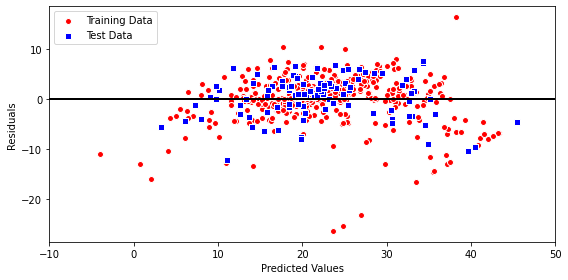

In [11]:
plt.figure(figsize=(8,4))
plt.scatter(y_train_pred,y_train_pred-y_train,color='red',marker='o',edgecolors='white',label='Training Data')
plt.scatter(y_test_pred,y_test_pred-y_test,color='blue',marker='s',edgecolors='white',label='Test Data')
plt.ylabel('Residuals')
plt.xlabel('Predicted Values')
plt.legend(loc='upper left')
plt.hlines(y=0,xmin=-10,xmax=50,color='black',lw=2)
plt.xlim([-10,50])
plt.tight_layout()
plt.show()